# Ï†ÑÌÜµÏ†Å ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÎßÅ

   ## Ïú†ÌÜµÎß§Ïû• ÏàòÏöîÎüâ ÏòàÏ∏°

* ÎπÑÏ¶àÎãàÏä§ ÌòÑÌô©
    * Í≥†Í∞ùÏÇ¨Îäî A Ïú†ÌÜµÌöåÏÇ¨Ïùò a Îß§Ïû• ÏûÖÎãàÎã§.
    * a Îß§Ïû•ÏóêÏÑú Ï£ºÎ†•ÏÉÅÌíàÏù∏ a01Ïóê ÎåÄÌïú Ïû¨Í≥† ÏµúÏ†ÅÌôîÎ•º ÏúÑÌï¥ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.
    * ÏµúÍ∑º Í≤ΩÏüÅÏÇ¨Ïùò Îß§Ïû•Ïù¥ Í∞ÄÍπåÏö¥ Í±∞Î¶¨Ïóê Ïò§ÌîàÌïòÏòÄÍ≥†, Ïú†ÏÇ¨Ìïú ÏÉÅÌíàÏóê ÎåÄÌïú Í≥µÍ≤©Ï†ÅÏù∏ ÎßàÏºÄÌåÖÏùÑ ÌéºÏπòÍ≥† ÏûàÏäµÎãàÎã§. 
* Î∞úÏ£º ÏµúÏ†ÅÌôîÎ•º ÏúÑÌïú ÏàòÏöîÎüâ ÏòàÏ∏° : 1ÏùºÌõÑÏùò ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°

![](https://www.artefact.com//wp-content/uploads/2021/08/GettyImages-1295864156-scaled.jpg)

# 1.ÌôòÍ≤ΩÏ§ÄÎπÑ

## (1) ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## (2) Ìï®Ïàò ÏÉùÏÑ± 

* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [2]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

* ÏûîÏ∞®Î∂ÑÏÑù

In [3]:
def residual_diag(residuals, lags = 30) :
    print('* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

## (3) Data Loading

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path)
data = data.loc[(data['date']>= '2013-06-01') & (data['date']< '2015-03-01')].reset_index(drop = True)
data.head(10)

date  item  sales  tot_sales  comp_sales
0  2013-06-01    28    124       1016          80
1  2013-06-02    28    139       1019          93
2  2013-06-03    28     77        676          65
3  2013-06-04    28     93        764          80
4  2013-06-05    28    117        818          80
5  2013-06-06    28    112        881          71
6  2013-06-07    28    127        929          81
7  2013-06-08    28    105        925          78
8  2013-06-09    28    129        998          95
9  2013-06-10    28    103        710          74

* Î≥ÄÏàò ÏÑ§Î™Ö

    * date : ÎÇ†Ïßú
    * item : ÏÉÅÌíàÏΩîÎìú (Ïó¨Í∏∞ÏÑúÎäî ÌïúÍ∞ÄÏßÄ ÏÉÅÌíàÎßå ÏûàÏùå)
    * sales : AÏú†ÌÜµÌöåÏÇ¨ a Îß§Ïû• ÌåêÎß§Îüâ ==> target
    * tot_sales : AÏú†ÌÜµÌöåÏÇ¨ Ï†ÑÏ≤¥ ÌåêÎß§Îüâ
    * comp_sales : Ïù∏Í∑ºÏóê ÏúÑÏπòÌïú BÏú†ÌÜµÌöåÏÇ¨ b Îß§Ïû• ÌåêÎß§Îüâ

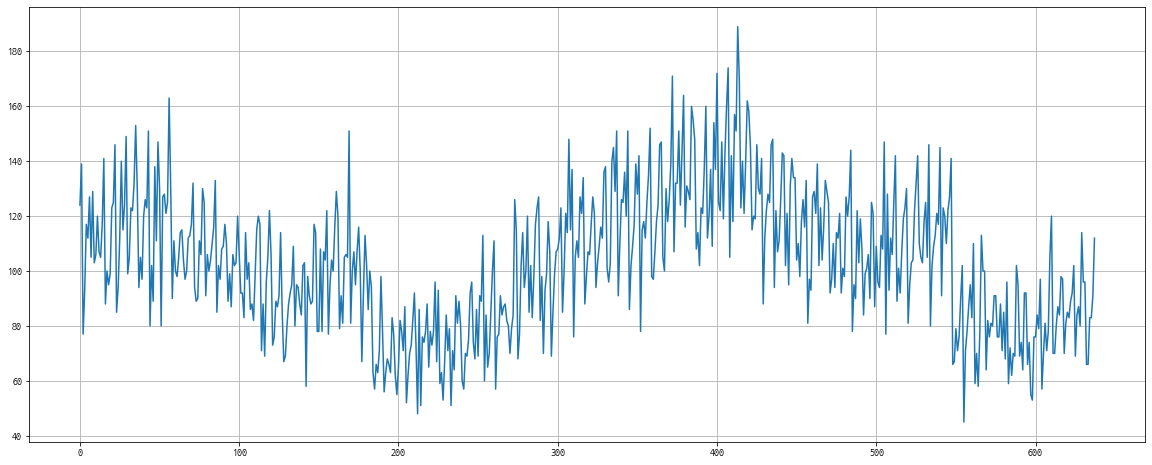

In [5]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

# 2.Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

## (1) y ÎßåÎì§Í∏∞

* 1Ïùº ÌõÑ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÎ†§Î©¥, yÎ•º Ïñ¥ÎñªÍ≤å ÎßåÎì§Ïñ¥Ïïº Ìï†ÍπåÏöî?

In [7]:
data['y'] = data['sales'].shift(-1)
display(data.head())
display(data.tail())

date  item  sales  tot_sales  comp_sales      y
0  2013-06-01    28    124       1016          80  139.0
1  2013-06-02    28    139       1019          93   77.0
2  2013-06-03    28     77        676          65   93.0
3  2013-06-04    28     93        764          80  117.0
4  2013-06-05    28    117        818          80  112.0

date  item  sales  tot_sales  comp_sales      y
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0
637  2015-02-28    28    112        774          77    NaN

In [8]:
# Ï†úÏùº ÎßàÏßÄÎßâ ÌñâÏùÄ ÏÇ≠Ï†ú
data.dropna(axis = 0, inplace = True)
data.tail()

date  item  sales  tot_sales  comp_sales      y
632  2015-02-23    28     66        488          43   66.0
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0

## (2) Feature Engineering
* ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ÏùÑ ÎèÑÏ∂úÌï¥ Î¥ÖÏãúÎã§.

## (3) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

### 1) x, y ÎÇòÎàÑÍ∏∞

In [9]:
target = 'y'

x = data.drop([target, 'date'], axis = 1) #Ï†úÍ±∞Ìï† Îïå, dateÎèÑ Ï†úÍ±∞
y = data.loc[:, target]

### 2) train, val Î∂ÑÌï†
* 1Ìöå Î∂ÑÌï† : train_test_split( x, y, test_size= , shuffle = False) 
    * test_size : ÏÜåÏàò - ÎπÑÏú®, ÏûêÏó∞Ïàò - Í∞ØÏàò
    * shuffle = False : ÏÑûÏßÄ ÎßêÍ≥† Îç∞Ïù¥ÌÑ∞ ÎÅùÏóêÏÑú test_size ÎßåÌÅº ÏûêÎ•¥Í∏∞
* k-fold cross validation for Time Seires : TimeSeriesSplit

In [10]:
# Ïó¨Í∏∞ÏÑúÎäî 1Ìöå Î∂ÑÌï†Î°ú ÏßÑÌñâÌï©ÎãàÎã§.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 30, shuffle = False)

# 3.Î™®Îç∏ÎßÅ1 : ARIMA

## (1) y Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00746
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.54662
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


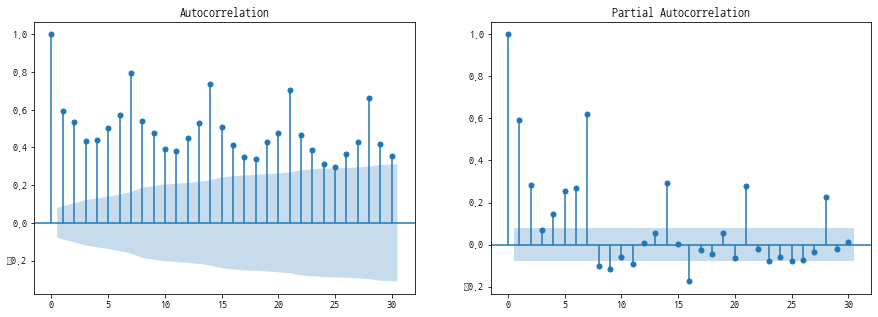

In [13]:
residual_diag(y_train, lags = 30)

In [ ]:
# Í∞íÏù¥ Î≤îÏúÑÏóêÏÑú Î≤óÏñ¥ÎÇ†Í≤ΩÏö∞
# ACF MA q Í∞í Ï°∞Ï†ï
# PACF AR p Í∞í Ï°∞Ï†ï

## (2) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

* p, d, q Í∞íÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÌï¥Ïïº Ìï†ÍπåÏöî?
* ARÏùò p Ï∞®ÏàòÏôÄ MA q Ï∞®Ïàò Î™®Îëê Í∞íÏù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§. ÏùºÎã® 1, 1ÏùÑ ÏßÄÏ†ïÌï©ÏãúÎã§.

### 1) ÌïôÏäµ

* sm.tsa.SARIMAX(train, order=(p,d,q)).fit()
    * Î™®Îç∏ ÏÑ†Ïñ∏Ïãú trainÏù¥ Ìè¨Ìï®
    * .fit()ÏúºÎ°ú ÌïôÏäµ.

In [14]:
m1_1 = sm.tsa.SARIMAX(y_train, order=(1,0,1)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Î™®Îç∏.resid : ÏûîÏ∞®Î•º ÎΩëÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
* ÏúÑÏóêÏÑú ÎßåÎì† Ìï®Ïàò residual_diag Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏûîÏ∞®ÏßÑÎã®ÏùÑ Ìï¥ Î¥ÖÏãúÎã§.

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  1e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


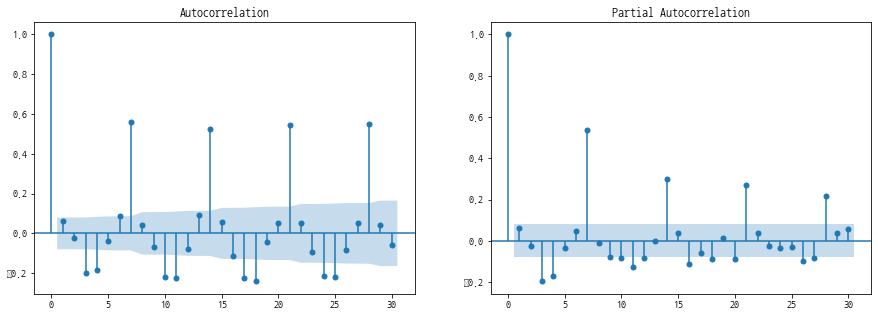

In [16]:
residual_diag(m1_1.resid, lags = 30)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò
* SARIMAX Î™®Îç∏.aicÎ°ú ÏâΩÍ≤å ÌÜµÍ≥ÑÎüâÏùÑ Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [17]:
m1_1.aic

5246.488864351655

#### ‚ë¢ Validation

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏóê ÎåÄÌï¥ ÎπÑÍµêÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î¥ÖÏãúÎã§.

In [20]:
pred = m1_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 15.265834521749838
MAPE: 0.1613604151880646


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

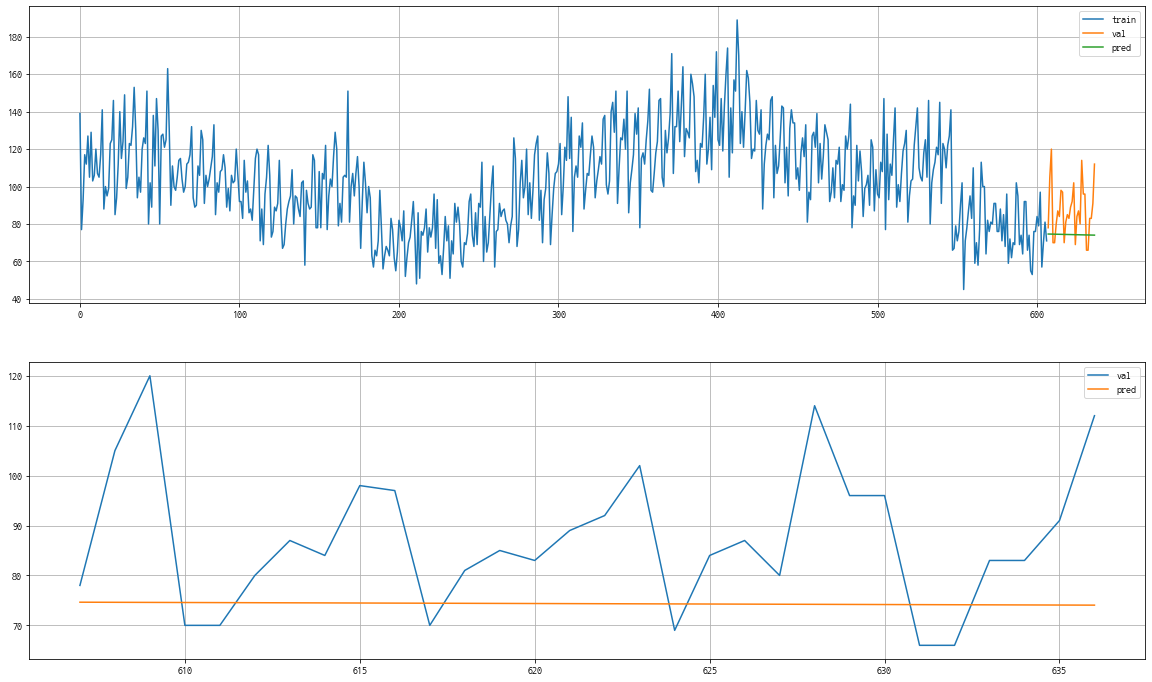

In [19]:
plot_model_result(y_train, y_val, pred)

## (3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

Ïã§Ï†úÎ°ú p, d, qÎ•º Ï∞æÎäî Í≥ºÏ†ïÏùÄ ÎßàÏπò Grid Search Ï≤òÎüº Í∞íÏùÑ Ï°∞Í∏àÏî© Ï°∞Ï†ïÌï¥Í∞ÄÎ©∞  ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ Ï∞æÏïÑÍ∞ÄÎäî Í≥ºÏ†ïÍ≥º Ïú†ÏÇ¨Ìï©ÎãàÎã§.


### 1) ÌïôÏäµ

In [22]:
from itertools import product

* Í∞íÏùò Î≤îÏúÑ ÏßÄÏ†ï
    * ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ ÏÜåÏöîÎê† Ïàò ÏûàÏúºÎãà Î≤îÏúÑÎ•º Ï†ÅÏ†àÌïòÍ≤å ÏßÄÏ†ïÌïòÏÑ∏Ïöî.

In [68]:
# product Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞íÏùò Ï°∞Ìï©ÏùÑ Íµ¨ÏÑ±
p = [1,2,3,4,5]
q = [1,2,3,4,5]
d = [0]
iter = list(product(p,d,q))
iter

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 3),
 (5, 0, 4),
 (5, 0, 5)]

* ÌäúÎãù

In [69]:
# 
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 0, 5)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 0, 5)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 0, 5)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 0, 5)
(5, 0, 1)
(5, 0, 2)
(5, 0, 3)
(5, 0, 4)
(5, 0, 5)


In [70]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(p,d,q)        mae          aic
19     (4, 0, 5)  10.178855  5023.110061

params(p,d,q)        mae         aic
24     (5, 0, 5)  11.950454  4959.06545

In [71]:
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ p, d, q Í∞íÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
result

params(p,d,q)        mae          aic
0      (1, 0, 1)  15.265835  5246.488864
1      (1, 0, 2)  15.196389  5241.159804
2      (1, 0, 3)  15.043315  5240.681974
3      (1, 0, 4)  15.774413  5203.102259
4      (1, 0, 5)  15.785825  5203.676833
5      (2, 0, 1)  15.170949  5240.869192
6      (2, 0, 2)  15.215981  5237.289556
7      (2, 0, 3)  15.197514  5236.922545
8      (2, 0, 4)  15.793384  5203.332329
9      (2, 0, 5)  15.736954  5186.900510
10     (3, 0, 1)  15.191100  5242.785340
11     (3, 0, 2)  15.183040  5236.609614
12     (3, 0, 3)  15.556694  5206.224998
13     (3, 0, 4)  15.450544  5207.974640
14     (3, 0, 5)  14.517851  5136.184235
15     (4, 0, 1)  15.369613  5212.163433
16     (4, 0, 2)  15.415434  5309.905931
17     (4, 0, 3)  15.285455  5354.941432
18     (4, 0, 4)  12.355367  5029.236793
19     (4, 0, 5)  10.178855  5023.110061
20     (5, 0, 1)  14.820287  5178.687326
21     (5, 0, 2)  15.922864  5275.091263
22     (5, 0, 3)  15.414144  5317.377817
23     (5, 0, 4)  11.549321  4999.416877
24     (5, 0, 5)  11.950454  4959.065450

In [85]:
m1_2 = sm.tsa.SARIMAX(y_train, order=(5,1,5)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


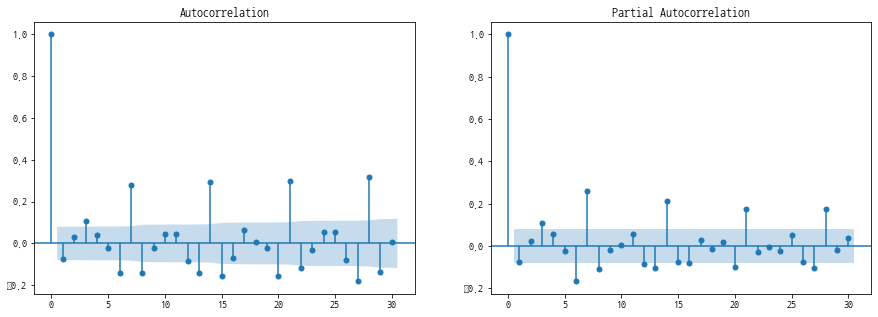

In [86]:
residual_diag(m1_2.resid, lags = 30)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [87]:
m1_2.aic

4982.367387450772

#### ‚ë¢ Validation

In [88]:
pred = m1_2.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 12.242976992519523
MAPE: 0.13191079537111355


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

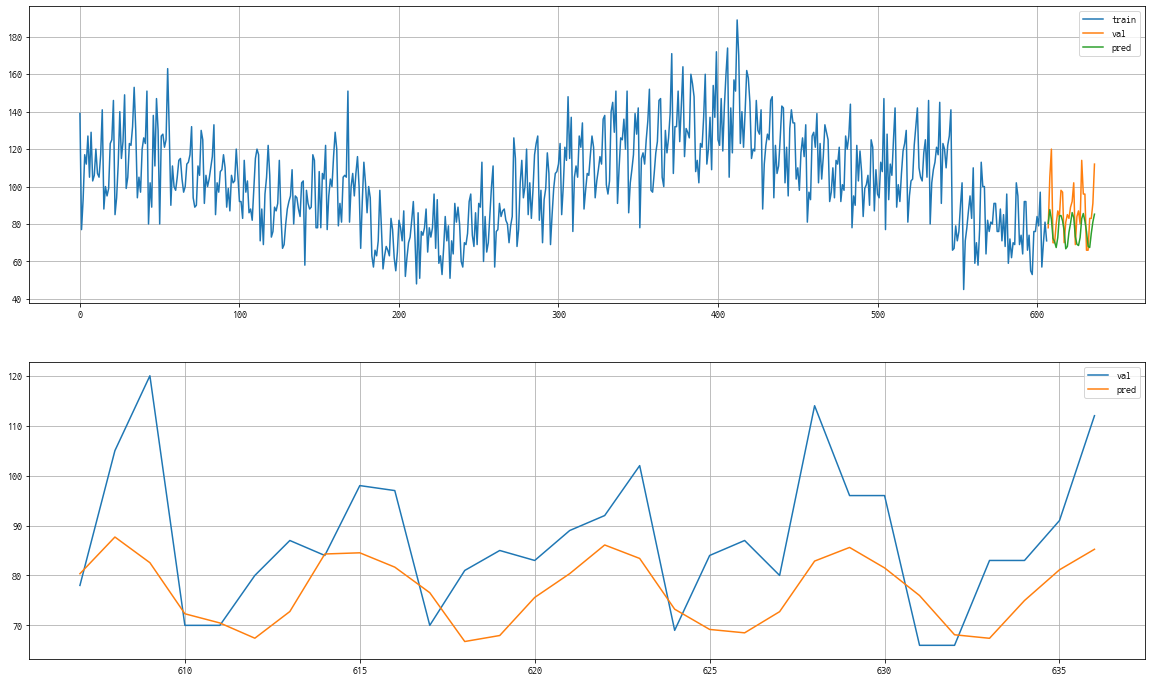

In [89]:
plot_model_result(y_train, y_val, pred)

# 4.Î™®Îç∏ÎßÅ2 : SARIMA

## (1) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

### 1) ÌïôÏäµ

In [90]:
# SARIMA Î™®Îç∏ÎßÅ : P, D, Q, m = 1,1,1,7 Î°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÏãúÎã§.
m1_3 = sm.tsa.SARIMAX(y_train, order=(5,1,5), seasonal_order=(1,1,1,7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


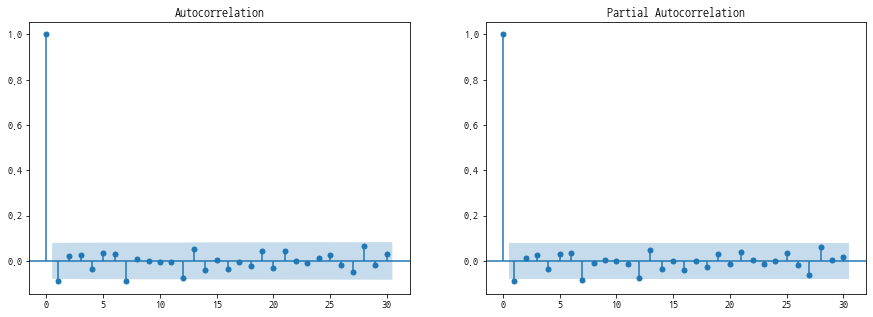

In [91]:
residual_diag(m1_3.resid, lags = 30)

#### ‚ë° AIC

In [92]:
m1_3.aic

4681.578741793711

#### ‚ë¢ Validation

In [94]:
pred = m1_3.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 10.995283427320413
MAPE: 0.12368046478795132


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

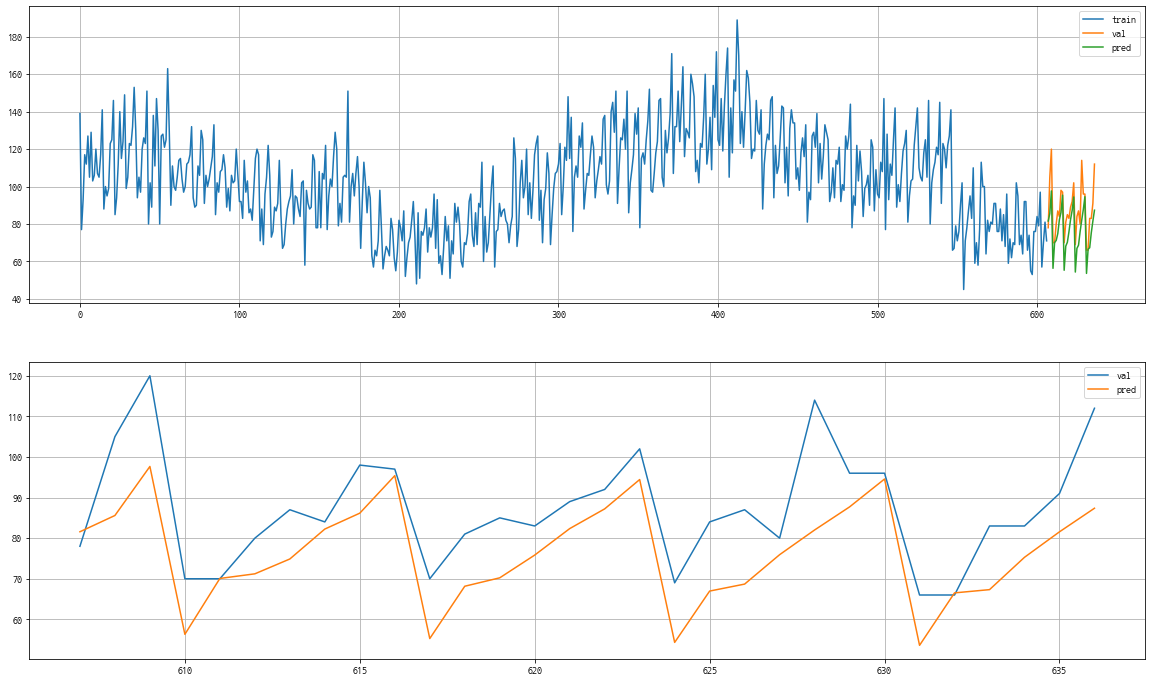

In [95]:
plot_model_result(y_train, y_val, pred)

## (2) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
* ÎÑàÎ¨¥ ÌÅ∞ Î≤îÏúÑÎ•º ÏßÄÏ†ïÌïòÎ©¥ ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î¶ΩÎãàÎã§.
    * DÎäî 1Î°ú Í≥†Ï†ï
    * P, QÎäî 1 ~ 4 ÏÇ¨Ïù¥ÏóêÏÑú Í≤∞Ï†ï

### 1) ÌïôÏäµ

In [97]:
P = [1,2,3]
Q = [1,2,3]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(5, 1, 5), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)


In [98]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(P,D,Q)        mae         aic
7     (3, 1, 2)  10.728229  4689.65478

params(P,D,Q)       mae          aic
3     (2, 1, 1)  11.33297  4680.136254

In [123]:
result

params(P,D,Q)        mae          aic
0     (1, 1, 1)  10.995283  4681.578742
1     (1, 1, 2)  10.809874  4683.950556
2     (1, 1, 3)  11.545103  4684.255124
3     (2, 1, 1)  11.332970  4680.136254
4     (2, 1, 2)  11.237826  4681.016155
5     (2, 1, 3)  11.250176  4683.422206
6     (3, 1, 1)  11.004840  4686.218797
7     (3, 1, 2)  10.728229  4689.654780
8     (3, 1, 3)  11.332144  4681.141384

In [99]:
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ P, D, Q Í∞íÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
m1_4 = sm.tsa.SARIMAX(y_train, order=(5,1,5), seasonal_order=(3,1,2,7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


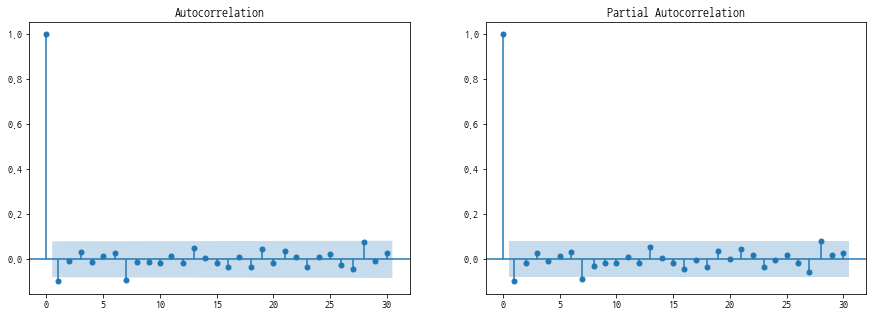

In [100]:
residual_diag(m1_4.resid, lags = 30)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [101]:
m1_4.aic

4689.654780304678

#### ‚ë¢ Validation

In [103]:
pre = m1_4.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 11.332144492037632
MAPE: 0.12812769302923077


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

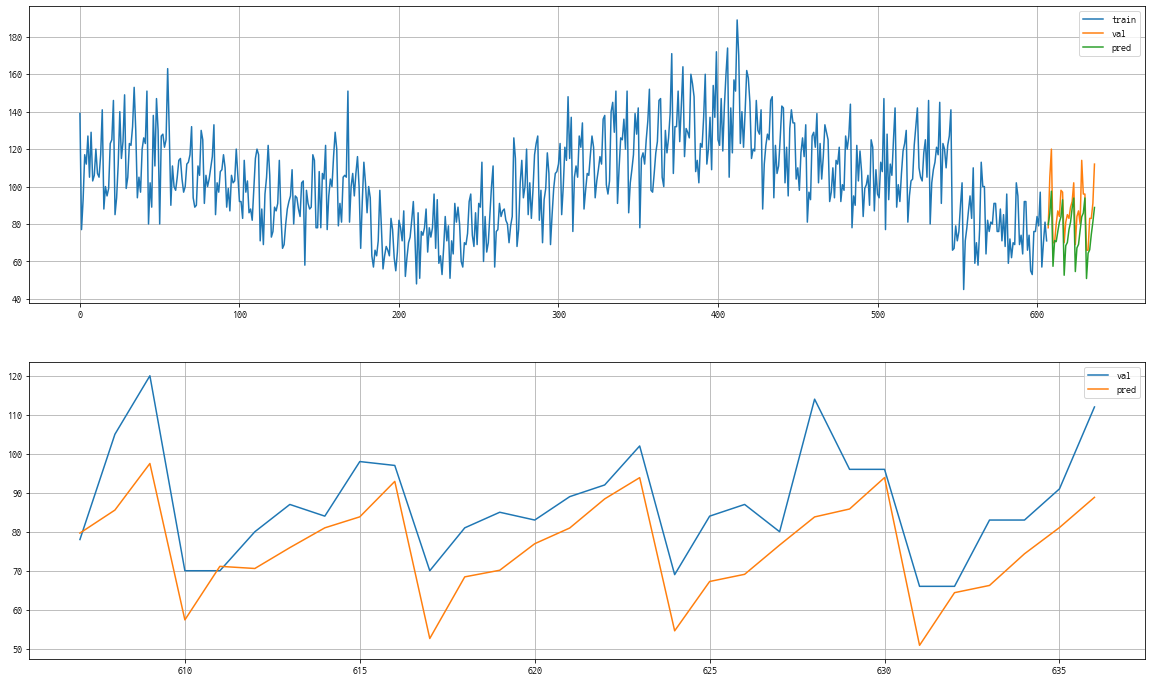

In [104]:
plot_model_result(y_train, y_val, pred)

# 5.Î™®Îç∏ÎßÅ3 : SARIMAX

## (1) Î™®Îç∏ÎßÅ

### 1) ÌïôÏäµ
* ÏúÑÏóêÏÑú Ï∞æÏùÄ Ï∞®Ïàò(p,d,q, P,D,Q,m) Ïóê x_trainÏùÑ ÎÑ£Ïñ¥ Î™®Îç∏ÎßÅÌï¥ Î¥ÖÏãúÎã§.

In [118]:
m1_5 = sm.tsa.SARIMAX(y_train, order=(5,1,5), seasonal_order=(1,1,1,7), exog=x_train).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


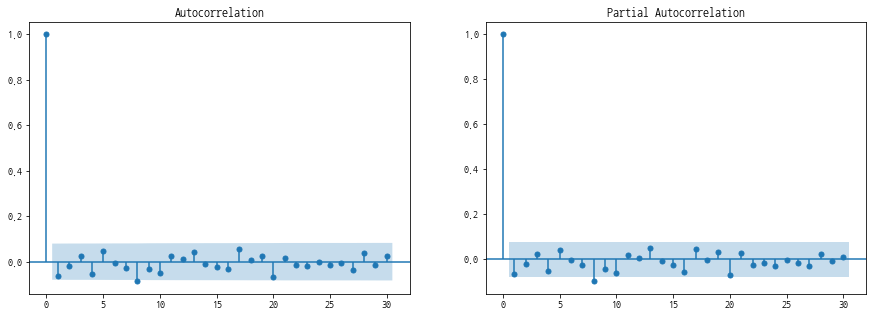

In [119]:
residual_diag(m1_5.resid, lags = 30)

#### ‚ë° AIC

In [120]:
m1_5.aic

4641.989654024797

#### ‚ë¢ Validation
SARIMAX Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, ÏòàÏ∏°Ìï† ÎïåÎäî exog=x_val ÏòµÏÖòÏù¥ Îì§Ïñ¥Í∞ÄÏïº Ìï®.

In [121]:
pred = m1_5.forecast(30, exog=x_val)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.886299027382431
MAPE: 0.08964667160661792


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

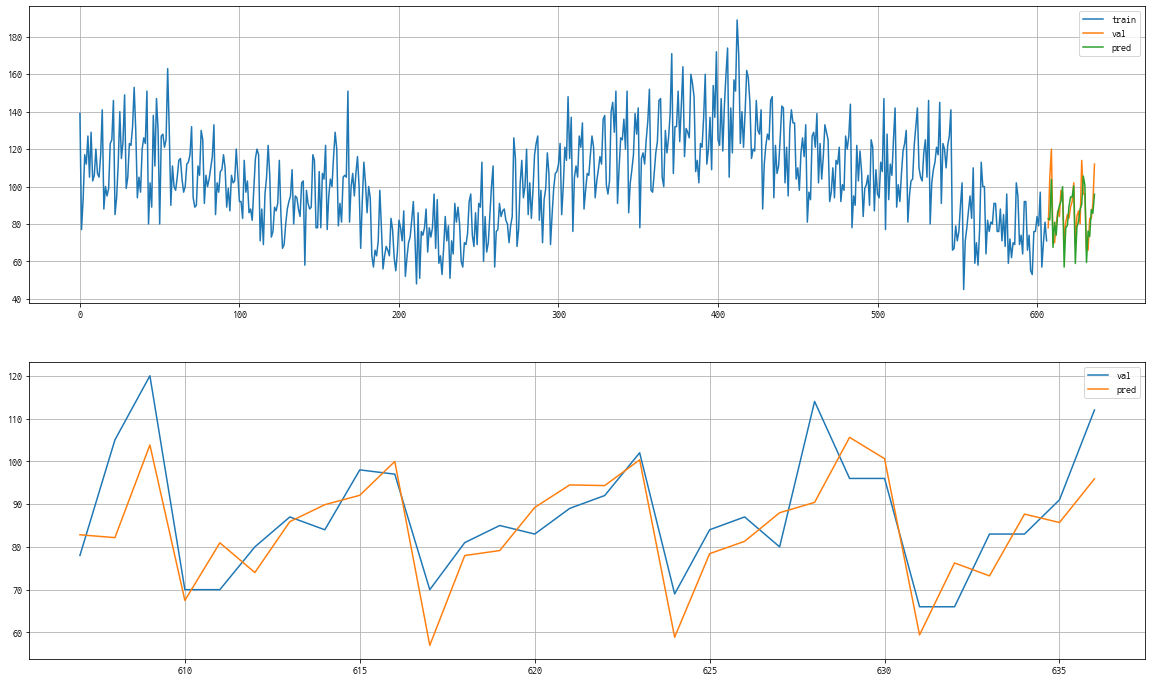

In [122]:
plot_model_result(y_train, y_val, pred)